In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
%matplotlib inline

data = pd.read_csv('/home/alex/Documents/AlgoTrading/XTX Challenge/XTXStarterKit-master/data.csv')
data.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1590.5,1591.0,1591.5,...,16.0,6.0,15.0,5.0,10.0,2.0,22.0,1.0,1.0,1.0
1,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1590.5,1591.0,1591.5,...,16.0,6.0,15.0,5.0,10.0,2.0,22.0,1.0,1.0,1.0
2,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1590.5,1591.0,1591.5,...,16.0,6.0,15.0,5.0,10.0,2.0,22.0,1.0,1.0,1.0
3,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1590.5,1591.0,1591.5,...,16.0,6.0,15.0,5.0,10.0,2.0,22.0,1.0,1.0,1.0
4,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1590.5,1591.0,1591.5,...,16.0,6.0,15.0,5.0,10.0,2.0,22.0,1.0,1.0,1.0


(20000,)


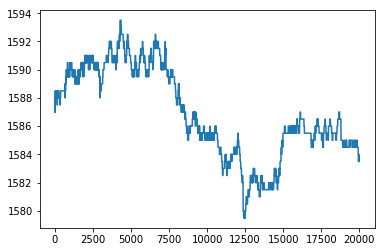

In [4]:
process_data = np.array(data['askRate0'])
plt.plot(process_data)
print(process_data.shape)

In [14]:


xhat = np.zeros((process_data.shape[0], 2))      # a posteri estimate of x
P = np.identity(2)                            # a posteri error estimate
xhatminus = np.zeros((process_data.shape[0], 2)) # a priori estimate of x
Pminus = np.identity(2)                      # a priori error estimate
K = np.zeros((2, 2))                  # gain or blending factor
Q = np.identity(2) * 0.1**7           # process variance
R = np.identity(2) * 0.1**2           # estimate of measurement variance, change to see effect
A = np.array([[1, 1], [0, 1]])
H = np.array([[1], [1]])

xhat[0, 0] = process_data[0]
xhat[0, 1] = 0
P[0] = 

for k in range(1, process_data.shape[0]):
    # time update
    xhatminus[k] = A @ xhat[k-1, :]
    Pminus = A @ P @ np.transpose(A) + Q

    # measurement update
    K = Pminus @ np.transpose(H) * np.inverse(H @ Pminus[k] @ np.transpose(H) + R)
#     xhat[k] = xhatminus[k] + K[k] * (process_data[k] - xhatminus[k])
#     P[k] = (1 - K[k]) * Pminus[k]

In [12]:
A @ xhat[0,] 

array([1587.,    0.])

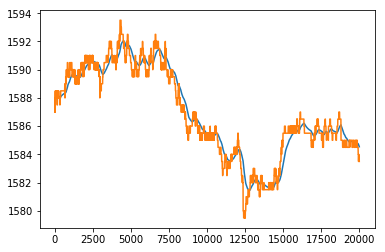

In [101]:
plt.plot(xhat)
plt.plot(process_data)

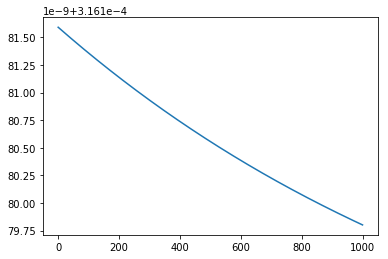

In [97]:
plt.plot(K[-1000:])

In [77]:
from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices = [[1]], observation_matrices = [[.1]])
xhat = np.zeros(process_data.shape) 
P = np.zeros(process_data.shape)

xhat[0] = process_data[0]
P[0] = 1000

for t in range(1, process_data.shape[0]):
    xhat[t], P[t] = kf.filter_update(xhat[t-1], P[t-1], process_data[t])
    

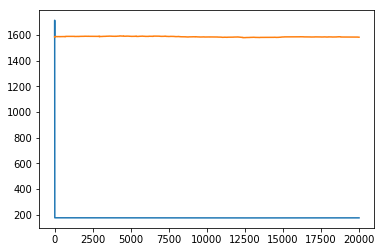

In [76]:
plt.plot(xhat)
plt.plot(process_data)